In [1]:
##Comment out this cell if you want to see warnings about depreciations, upgrades, etc, involving Cuda/Cudnn/Tensorflow
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'


# Additional lines to suppress TensorFlow warnings
#import tensorflow as tf
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import sys
import os
import tensorflow as tf

# Print Python, Driver, and TensorFlow versions
print("Python and Driver Version:", sys.version)
print("TensorFlow Version:", tf.__version__)

# Set GPU as the Default Device
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPU(s),", len(logical_gpus), "Logical GPU(s)")
        print("GPU set as the default device.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU available.")

# Check GPU Availability
GPU_LIST = tf.config.list_physical_devices('GPU')
print("GPU found?:", len(GPU_LIST) > 0)
print("Num GPUs Available:", len(GPU_LIST))

# Display Local Devices
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


Python and Driver Version: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
TensorFlow Version: 2.13.0
1 Physical GPU(s), 1 Logical GPU(s)
GPU set as the default device.
GPU found?: True
Num GPUs Available: 1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9219454144494278473
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7917797376
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10335202170438635078
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


###### The below Python code performs a rapid performance comparison between TensorFlow and PyTorch executed on both GPU and CPU for a specific computation. It calculates and prints the average execution time for multiple iterations of a matrix multiplication operation, providing insights into the relative efficiency of TensorFlow and PyTorch on different hardware configurations.

In [4]:
import tensorflow as tf
import torch

num_iterations = 20

# TensorFlow GPU
tf_gpu_total_time = 0
for _ in range(num_iterations):
    with tf.device('/GPU:0'):
        tf_gpu_start = tf.timestamp()
        # Your TensorFlow GPU computations here
        a = tf.random.normal((1000, 1000))
        b = tf.random.normal((1000, 1000))
        tf_gpu_result = tf.matmul(a, b)
        tf_gpu_end = tf.timestamp()
    tf_gpu_total_time += (tf_gpu_end - tf_gpu_start)

# TensorFlow CPU
tf_cpu_total_time = 0
for _ in range(num_iterations):
    with tf.device('/CPU:0'):
        tf_cpu_start = tf.timestamp()
        # Your TensorFlow CPU computations here
        a = tf.random.normal((1000, 1000))
        b = tf.random.normal((1000, 1000))
        tf_cpu_result = tf.matmul(a, b)
        tf_cpu_end = tf.timestamp()
    tf_cpu_total_time += (tf_cpu_end - tf_cpu_start)

# Torch GPU
torch.cuda.init()
torch_gpu_total_time = 0
for _ in range(num_iterations):
    torch_gpu_start = torch.cuda.Event(enable_timing=True)
    torch_gpu_end = torch.cuda.Event(enable_timing=True)
    torch_gpu_start.record()
    # Your Torch GPU computations here
    a = torch.randn(1000, 1000).cuda()
    b = torch.randn(1000, 1000).cuda()
    torch_gpu_result = torch.matmul(a, b)
    torch_gpu_end.record()
    torch.cuda.synchronize()
    torch_gpu_total_time += torch_gpu_start.elapsed_time(torch_gpu_end) / 1000.0

# Torch CPU
torch_cpu_total_time = 0
for _ in range(num_iterations):
    torch_cpu_start = torch.cuda.Event(enable_timing=True)
    torch_cpu_end = torch.cuda.Event(enable_timing=True)
    torch_cpu_start.record()
    # Your Torch CPU computations here
    a = torch.randn(1000, 1000)
    b = torch.randn(1000, 1000)
    torch_cpu_result = torch.matmul(a, b)
    torch_cpu_end.record()
    torch.cuda.synchronize()
    torch_cpu_total_time += torch_cpu_start.elapsed_time(torch_cpu_end) / 1000.0

# Calculate average execution time
tf_gpu_avg_execution_time = tf_gpu_total_time / num_iterations
tf_cpu_avg_execution_time = tf_cpu_total_time / num_iterations
torch_gpu_avg_execution_time = torch_gpu_total_time / num_iterations
torch_cpu_avg_execution_time = torch_cpu_total_time / num_iterations

# Compare performance
print(f"TensorFlow GPU average execution time: {tf_gpu_avg_execution_time} seconds")
print(f"TensorFlow CPU average execution time: {tf_cpu_avg_execution_time} seconds")
print(f"Torch GPU average execution time: {torch_gpu_avg_execution_time} seconds")
print(f"Torch CPU average execution time: {torch_cpu_avg_execution_time} seconds")


TensorFlow GPU average execution time: 0.0053086519241333004 seconds
TensorFlow CPU average execution time: 0.009976005554199219 seconds
Torch GPU average execution time: 0.008221734404563903 seconds
Torch CPU average execution time: 0.012255556774139403 seconds


# Advanced Test Description:

#### The below Python code is designed for training and evaluating a Convolutional Neural Network (CNN) model on the CIFAR-10 dataset. It provides options for testing on different devices (GPU and CPU) and with different batch sizes. The code performs the following steps:

#### Loading CIFAR-10 Data: The code loads the CIFAR-10 dataset, which consists of images from ten different classes (e.g., airplane, automobile, bird, etc.). It splits the dataset into training and testing sets.

#### Model Architecture: It defines a CNN model architecture with dropout regularization. The architecture includes convolutional layers, max-pooling layers, flattening, dense layers, and dropout layers to prevent overfitting. The model is designed for image classification.

#### Training the Model: The model is trained using the Adam optimizer with an initial learning rate of 0.002. It includes custom callbacks like ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau to monitor and control the training process. These callbacks help save the best model, stop training early if validation loss doesn't improve, and adjust the learning rate when the validation loss plateaus.

#### Evaluation: After training, the model is evaluated using various metrics, including accuracy, recall, precision, specificity, and AUC-ROC score. Confusion matrices are also generated to assess the model's performance on the CIFAR-10 test data.

#### Testing Combinations: The code iterates through different combinations of batch sizes and devices, allowing users to assess the model's performance under various conditions.

#### Results Collection: The results, including training time, accuracy, and other metrics, are collected in a Pandas DataFrame for further analysis and evaluation.

#### The code is flexible, making it easy to experiment with different hyperparameters and analyze the performance of the CNN model on the CIFAR-10 dataset.

In [41]:
import tensorflow_datasets as tfds
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the devices for testing
devices = ['GPU']  #Change to include CPU/GPU, together or seperately
#devices = ['CPU', 'GPU'] 

# Set batch sizes to test
batch_sizes = [128, 512, 2048]
epochs = 100  # Number of training epochs

# Function to load CIFAR-10 dataset and get class names
def load_cifar10():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return x_train, y_train, x_test, y_test, class_names  # Return class names

# Initialize results dictionary with "Device" column
results = {
    "Device": [],
    "Batch Size": [],
    "Training Time (s)": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],
    "Specificity": [],
    "AUC-ROC": [],
    "Confusion Matrix": [],
}

# Initialize a list to store training data
training_data = []

# Function to create a CNN model with dropout
def create_cnn_model():
    model = keras.Sequential([
        keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        Dropout(0.5),  # Add dropout regularization with a dropout rate of 0.5
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Define a custom learning rate scheduler using ReduceLROnPlateau
def learning_rate_scheduler(epoch, lr):
    max_lr = 0.001  # Adjust as needed
    min_lr = 1e-7  # Adjust as needed
    return min_lr + 0.5 * (max_lr - min_lr) * (1 + np.cos(np.pi * (epoch / epochs)))


# Function to train the model
def train_model(model, x_train, y_train, x_test, y_test, batch_size, epochs, device_name):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Add ModelCheckpoint to save the best model based on validation loss
    checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
    
    # Add EarlyStopping to stop training if validation loss doesn't improve
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=False)
    
    # Use ReduceLROnPlateau callback to adjust learning rate when validation loss plateaus
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-7, verbose=1)
    
    start_time = time.time()
    
    # Define a custom callback to record learning rate and other data
    class CustomCallback(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            lr = float(keras.backend.get_value(self.model.optimizer.learning_rate))
            accuracy = logs['accuracy']
            validation_loss = logs['val_loss']
            training_loss = logs['loss']
            training_accuracy = logs['accuracy']
            validation_accuracy = logs['val_accuracy']
            training_data.append({'Epoch': epoch, 'Batch Size': batch_size, 'Device': device_name, 'Learning Rate': lr,
                                  'Training Loss': training_loss, 'Validation Loss': validation_loss,
                                  'Training Accuracy': training_accuracy, 'Validation Accuracy': validation_accuracy})
    
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[checkpoint, early_stopping, reduce_lr, CustomCallback()])
    
    end_time = time.time()
    training_time = end_time - start_time
    return training_time, history

# Function to evaluate the model and get accuracy and confusion matrix
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    confusion_mat = confusion_matrix(y_test, y_pred_classes)
    return accuracy, confusion_mat

# Calculate specificity from the confusion matrix
def calculate_specificity(confusion_matrix):
    true_negatives = confusion_matrix.sum(axis=0) - confusion_matrix.diagonal()
    false_positives = confusion_matrix.sum(axis=1) - confusion_matrix.diagonal()
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

# Calculate AUC-ROC score
def calculate_auc_roc(model, x_test, y_test):
    y_pred = model.predict(x_test)
    auc_roc = roc_auc_score(y_test, y_pred, average="macro", multi_class="ovr")
    return auc_roc

# Load CIFAR-10 dataset and get class names
x_train, y_train, x_test, y_test, class_names = load_cifar10()

# Train and evaluate the model with different batch sizes and devices
for batch_size in batch_sizes:
    print(f"Training with Batch Size: {batch_size}")
    
    for device in devices:
        print(f"Training on {device}...")
        results["Device"].append(device)
        
        # Choose the device for training
        with tf.device(f'/{device}:0'):
            model = create_cnn_model()
            training_time, history = train_model(model, x_train, y_train, x_test, y_test, batch_size, epochs, device)
    
        accuracy, confusion = evaluate_model(model, x_test, y_test)
        recall = recall_score(y_test, np.argmax(model.predict(x_test), axis=1), average="macro")
        precision = precision_score(y_test, np.argmax(model.predict(x_test), axis=1), average="macro")
        specificity = calculate_specificity(confusion)
        auc_roc = calculate_auc_roc(model, x_test, y_test)

        results["Batch Size"].append(batch_size)
        results["Training Time (s)"].append(training_time)
        results["Accuracy"].append(accuracy)
        results["Recall"].append(recall)
        results["Precision"].append(precision)
        results["Specificity"].append(specificity.mean())
        results["AUC-ROC"].append(auc_roc)
        results["Confusion Matrix"].append(confusion)

# Create a DataFrame from the results dictionary
df = pd.DataFrame(results)



Training with Batch Size: 128
Training on GPU...
Epoch 1/100
388/391 [============================>.] - ETA: 0s - loss: 2.9148 - accuracy: 0.1280
Epoch 1: val_loss improved from inf to 2.12148, saving model to best_model.h5
391/391 [==============================] - 3s 6ms/step - loss: 2.9102 - accuracy: 0.1284 - val_loss: 2.1215 - val_accuracy: 0.2110 - lr: 0.0010
Epoch 2/100
384/391 [============================>.] - ETA: 0s - loss: 1.9777 - accuracy: 0.2529
Epoch 2: val_loss improved from 2.12148 to 1.67136, saving model to best_model.h5
391/391 [==============================] - 2s 5ms/step - loss: 1.9754 - accuracy: 0.2538 - val_loss: 1.6714 - val_accuracy: 0.3854 - lr: 0.0010
Epoch 3/100
390/391 [============================>.] - ETA: 0s - loss: 1.7552 - accuracy: 0.3412
Epoch 3: val_loss improved from 1.67136 to 1.47838, saving model to best_model.h5
391/391 [==============================] - 2s 5ms/step - loss: 1.7555 - accuracy: 0.3412 - val_loss: 1.4784 - val_accuracy: 0.4531

Epoch 26/100
384/391 [============================>.] - ETA: 0s - loss: 0.6135 - accuracy: 0.7732
Epoch 26: val_loss did not improve from 0.96643
391/391 [==============================] - 2s 5ms/step - loss: 0.6128 - accuracy: 0.7735 - val_loss: 0.9738 - val_accuracy: 0.7043 - lr: 3.0000e-04
Epoch 27/100
387/391 [============================>.] - ETA: 0s - loss: 0.5648 - accuracy: 0.7901
Epoch 27: val_loss did not improve from 0.96643
391/391 [==============================] - 2s 5ms/step - loss: 0.5646 - accuracy: 0.7900 - val_loss: 1.0070 - val_accuracy: 0.7055 - lr: 3.0000e-04
Epoch 28/100
390/391 [============================>.] - ETA: 0s - loss: 0.5433 - accuracy: 0.7957
Epoch 28: val_loss did not improve from 0.96643

Epoch 28: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
391/391 [==============================] - 2s 5ms/step - loss: 0.5434 - accuracy: 0.7956 - val_loss: 1.0326 - val_accuracy: 0.7040 - lr: 3.0000e-04
Epoch 29/100
384/391 [==================

97/98 [============================>.] - ETA: 0s - loss: 1.1394 - accuracy: 0.5856
Epoch 18: val_loss did not improve from 1.04773
98/98 [==============================] - 1s 10ms/step - loss: 1.1392 - accuracy: 0.5856 - val_loss: 1.0521 - val_accuracy: 0.6341 - lr: 0.0010
Epoch 19/100
97/98 [============================>.] - ETA: 0s - loss: 1.1006 - accuracy: 0.6002
Epoch 19: val_loss improved from 1.04773 to 1.01458, saving model to best_model.h5
98/98 [==============================] - 1s 10ms/step - loss: 1.1006 - accuracy: 0.6003 - val_loss: 1.0146 - val_accuracy: 0.6514 - lr: 0.0010
Epoch 20/100
94/98 [===========================>..] - ETA: 0s - loss: 1.0592 - accuracy: 0.6140
Epoch 20: val_loss improved from 1.01458 to 1.00265, saving model to best_model.h5
98/98 [==============================] - 1s 10ms/step - loss: 1.0597 - accuracy: 0.6138 - val_loss: 1.0026 - val_accuracy: 0.6536 - lr: 0.0010
Epoch 21/100
97/98 [============================>.] - ETA: 0s - loss: 1.0462 - acc

23/25 [==========================>...] - ETA: 0s - loss: 1.4489 - accuracy: 0.4837
Epoch 6: val_loss improved from 1.39727 to 1.30179, saving model to best_model.h5
25/25 [==============================] - 1s 30ms/step - loss: 1.4485 - accuracy: 0.4846 - val_loss: 1.3018 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 7/100
23/25 [==========================>...] - ETA: 0s - loss: 1.3793 - accuracy: 0.5137
Epoch 7: val_loss improved from 1.30179 to 1.29370, saving model to best_model.h5
25/25 [==============================] - 1s 29ms/step - loss: 1.3814 - accuracy: 0.5131 - val_loss: 1.2937 - val_accuracy: 0.5492 - lr: 0.0010
Epoch 8/100
23/25 [==========================>...] - ETA: 0s - loss: 1.3265 - accuracy: 0.5330
Epoch 8: val_loss improved from 1.29370 to 1.24380, saving model to best_model.h5
25/25 [==============================] - 1s 30ms/step - loss: 1.3263 - accuracy: 0.5332 - val_loss: 1.2438 - val_accuracy: 0.5671 - lr: 0.0010
Epoch 9/100
23/25 [==========================>...] -

23/25 [==========================>...] - ETA: 0s - loss: 0.7095 - accuracy: 0.7486
Epoch 32: val_loss did not improve from 1.02184

Epoch 32: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
25/25 [==============================] - 1s 29ms/step - loss: 0.7110 - accuracy: 0.7481 - val_loss: 1.0361 - val_accuracy: 0.6595 - lr: 3.0000e-04
Epoch 33/100
23/25 [==========================>...] - ETA: 0s - loss: 0.6958 - accuracy: 0.7545
Epoch 33: val_loss did not improve from 1.02184
25/25 [==============================] - 1s 29ms/step - loss: 0.6966 - accuracy: 0.7543 - val_loss: 1.0309 - val_accuracy: 0.6629 - lr: 9.0000e-05
Epoch 34/100
24/25 [===========================>..] - ETA: 0s - loss: 0.6927 - accuracy: 0.7552
Epoch 34: val_loss did not improve from 1.02184
25/25 [==============================] - 1s 28ms/step - loss: 0.6930 - accuracy: 0.7553 - val_loss: 1.0317 - val_accuracy: 0.6625 - lr: 9.0000e-05
Epoch 35/100
23/25 [==========================>...] - ETA: 0s 

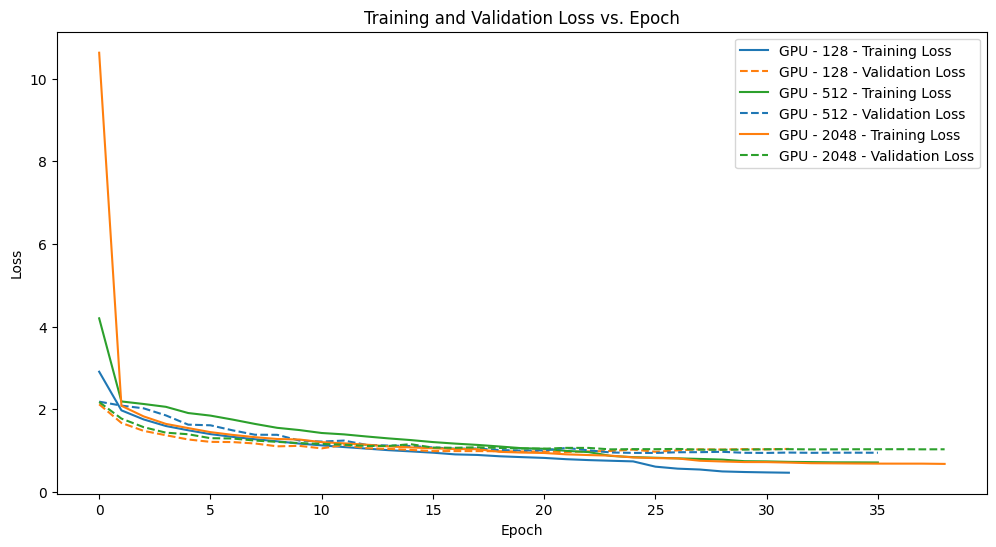

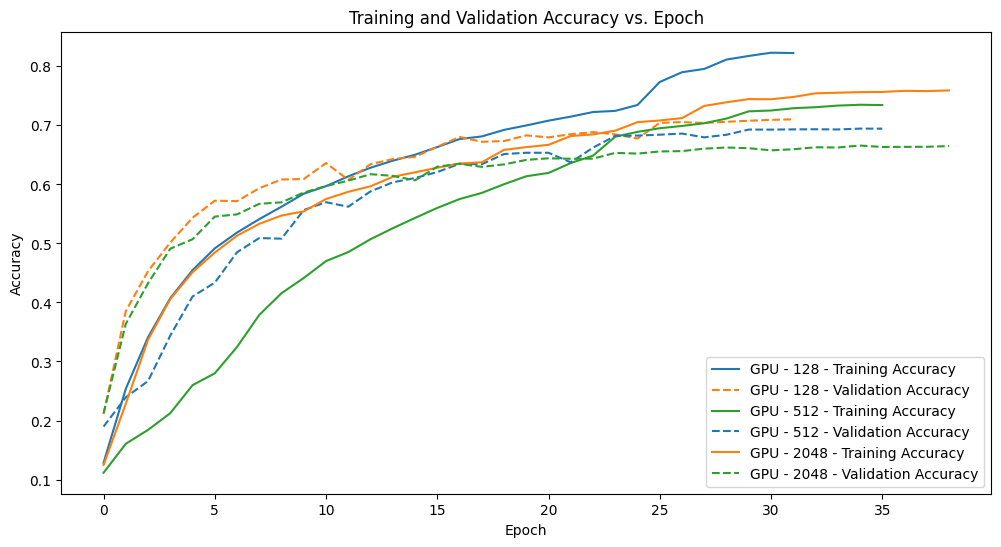

In [42]:
import matplotlib.pyplot as plt

# Convert the training data list to a DataFrame
training_df = pd.DataFrame(training_data)

# Add a new column to combine "Device" and "Batch Size"
training_df['Device-Batch'] = training_df['Device'] + ' - ' + training_df['Batch Size'].astype(str)

# Create a custom color cycle for the unique batch-device combinations
unique_combinations = training_df['Device-Batch'].unique()
colors = plt.cm.tab10.colors  # You can use a different colormap
color_cycler = plt.cm.tab10(range(len(unique_combinations)))

# Plot the training and validation loss vs. epoch for each batch-device combination with a unique color cycle
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_prop_cycle('color', color_cycler)
for device_batch in unique_combinations:
    df_filtered = training_df[training_df['Device-Batch'] == device_batch]
    plt.plot(df_filtered['Epoch'], df_filtered['Training Loss'], label=f'{device_batch} - Training Loss')
    # Make the validation lines dashed
    plt.plot(df_filtered['Epoch'], df_filtered['Validation Loss'], linestyle='--', label=f'{device_batch} - Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs. Epoch')
plt.show()

# Plot the training and validation accuracy vs. epoch for each batch-device combination with a unique color cycle
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_prop_cycle('color', color_cycler)
for device_batch in unique_combinations:
    df_filtered = training_df[training_df['Device-Batch'] == device_batch]
    plt.plot(df_filtered['Epoch'], df_filtered['Training Accuracy'], label=f'{device_batch} - Training Accuracy')
    # Make the validation lines dashed
    plt.plot(df_filtered['Epoch'], df_filtered['Validation Accuracy'], linestyle='--', label=f'{device_batch} - Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy vs. Epoch')
plt.show()


In [43]:
# Analyze the training data for overfitting, underfitting, or good fit
def assess_model_fit(training_data):
    # Group the data by Device-Batch combination
    grouped = training_df.groupby('Device-Batch')
    
    fit_assessment = {}

    for group, data in grouped:
        # Use only the last 10 data points for assessment
        last_10_data = data.iloc[-10:]
        
        training_loss = last_10_data['Training Loss'].values
        validation_loss = last_10_data['Validation Loss'].values
        training_accuracy = last_10_data['Training Accuracy'].values
        validation_accuracy = last_10_data['Validation Accuracy'].values

        if (
            training_loss[-1] > validation_loss[-1] or
            (validation_loss[-1] - validation_loss[-2]) > 0.01 or
            (validation_accuracy[-1] - validation_accuracy[-2]) < 0.01
        ):
            fit_assessment[group] = 'Overfitting'
        elif (
            training_loss[-1] > 1.5 or
            validation_loss[-1] > 1.5 or
            (validation_accuracy[-1] - validation_accuracy[-2]) < 0.05
        ):
            fit_assessment[group] = 'Underfitting'
        else:
            fit_assessment[group] = 'Good Fit'
    
    return fit_assessment

fit_assessment = assess_model_fit(training_df)
for group, assessment in fit_assessment.items():
    print(f"{group}: {assessment}")

GPU - 128: Overfitting
GPU - 2048: Overfitting
GPU - 512: Overfitting


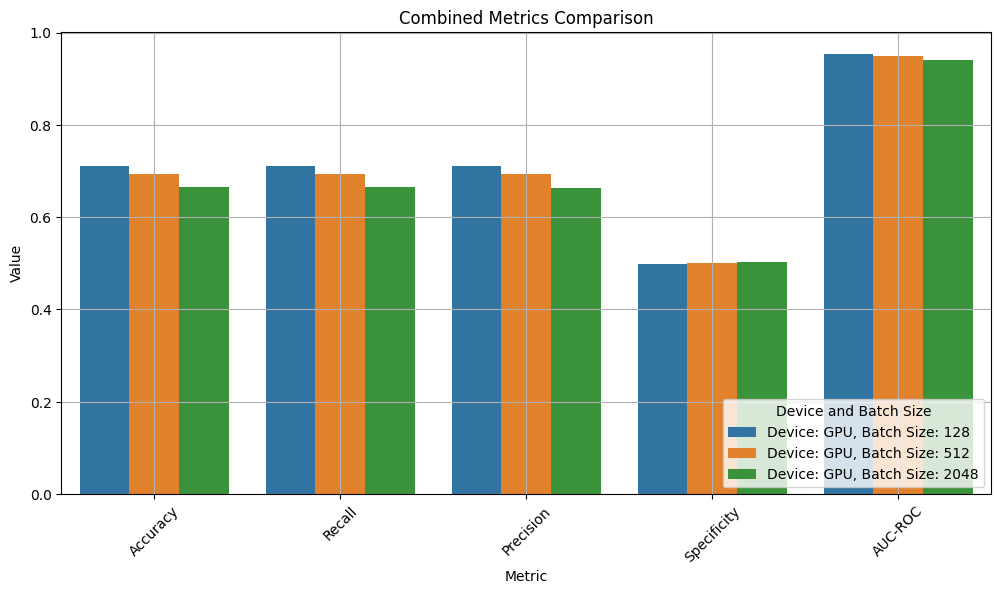

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics available in your DataFrame
available_metrics = ["Accuracy", "Recall", "Precision", "Specificity", "AUC-ROC"]

# Filter the metrics list to include only the available metrics
metrics = available_metrics

combined_metrics_data = []
for metric in metrics:
    for device, batch_size in zip(df['Device'], df['Batch Size']):
        metric_value = df[(df['Device'] == device) & (df['Batch Size'] == batch_size)][metric].values[0]
        combined_metrics_data.append((metric, f"Device: {device}, Batch Size: {batch_size}", metric_value))

combined_metrics_df = pd.DataFrame(combined_metrics_data, columns=["Metric", "Device_Batch", "Value"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Value", hue="Device_Batch", errorbar=None, data=combined_metrics_df)
plt.title("Combined Metrics Comparison")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.grid(True)
plt.legend(title="Device and Batch Size", loc='lower right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


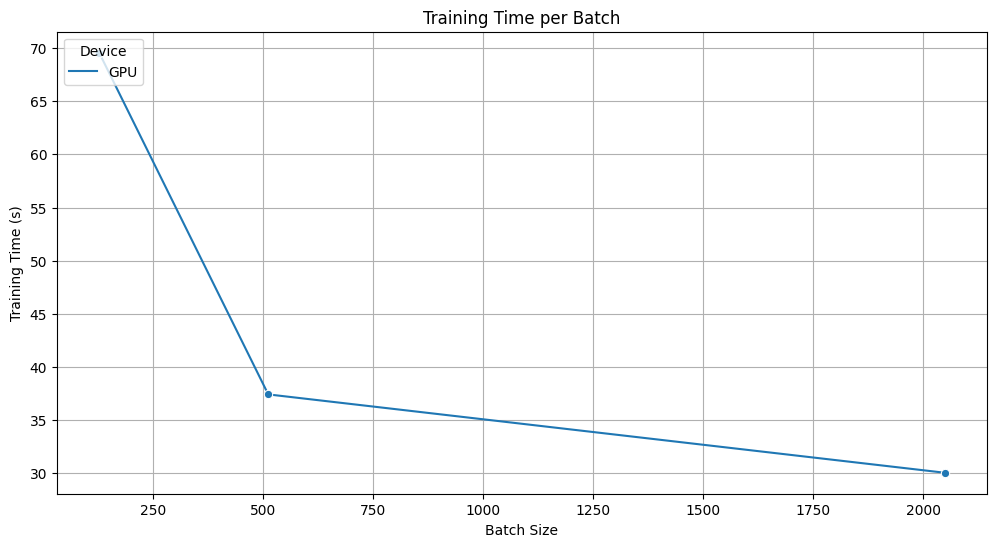

  Device  Batch Size  Training Time (s)  Accuracy  Recall  Precision  \
0    GPU         128          69.561852    0.7102  0.7102   0.711386   
1    GPU         512          37.415977    0.6944  0.6944   0.694062   
2    GPU        2048          30.048192    0.6649  0.6649   0.664068   

   Specificity   AUC-ROC                                   Confusion Matrix  
0     0.497618  0.953254  [[760, 15, 51, 22, 12, 5, 8, 9, 83, 35], [25, ...  
1     0.500618  0.948960  [[753, 13, 66, 16, 19, 5, 7, 9, 76, 36], [21, ...  
2     0.502491  0.940397  [[683, 24, 61, 22, 27, 10, 17, 14, 94, 48], [2...  


In [45]:

# Training Time per Batch (Line Graph for GPU/CPU)
training_time_data = df[df["Device"].isin(["CPU", "GPU"])]

plt.figure(figsize=(12, 6))
sns.lineplot(x="Batch Size", y="Training Time (s)", hue="Device", data=training_time_data, marker="o")
plt.title("Training Time per Batch")
plt.xlabel("Batch Size")
plt.ylabel("Training Time (s)")
plt.grid(True)
plt.legend(title="Device", loc="upper left")
plt.show()

print(training_time_data)


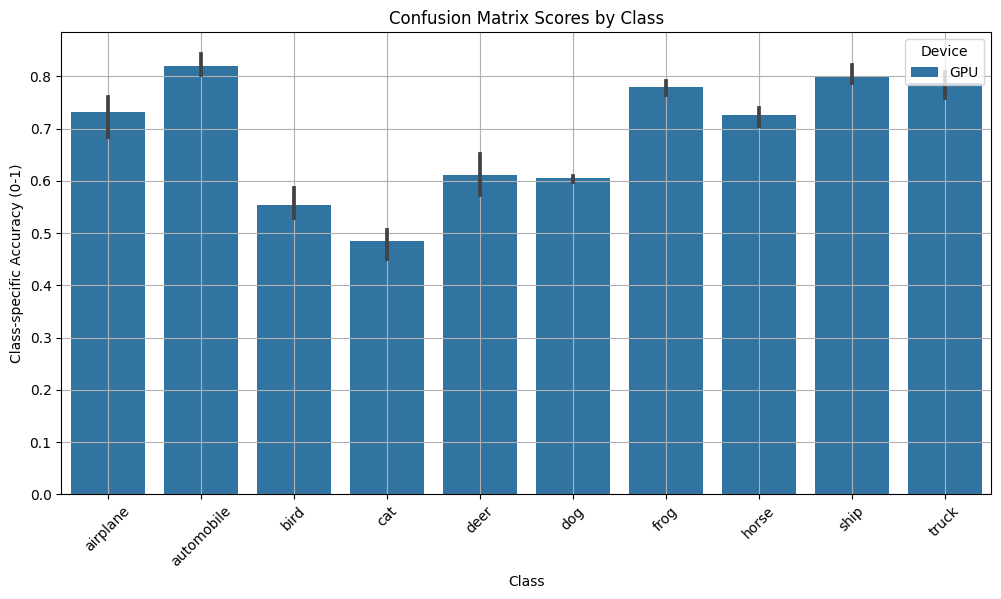

In [46]:
from sklearn.metrics import confusion_matrix

# Initialize an empty dictionary to store confusion matrix scores
confusion_data = {
    "Device": [],
    "Batch Size": [],
    "Class": [],
    "Class-specific Accuracy": [],
}

# Iterate through devices and batch sizes to calculate scores by class
for device in ["GPU"]:
    for batch_size in batch_sizes:
        df_batch = df[(df["Device"] == device) & (df["Batch Size"] == batch_size)]
        confusion_matrices = df_batch["Confusion Matrix"].values

        # Initialize an empty confusion matrix to accumulate values
        avg_confusion_matrix = np.zeros((len(class_names), len(class_names)), dtype=int)

        # Accumulate confusion matrices
        for matrix in confusion_matrices:
            avg_confusion_matrix += np.array(matrix)

        # Calculate scores (0-1) for each class based on the confusion matrix
        total_per_class = avg_confusion_matrix.sum(axis=1)
        correct_per_class = np.diag(avg_confusion_matrix)
        scores_per_class = correct_per_class / total_per_class

        # Add the data to the dictionary
        for class_index, class_name in enumerate(class_names):
            confusion_data["Device"].append(device)
            confusion_data["Batch Size"].append(batch_size)
            confusion_data["Class"].append(class_name)
            confusion_data["Class-specific Accuracy"].append(scores_per_class[class_index])

# Create a DataFrame from the confusion data
confusion_df = pd.DataFrame(confusion_data)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="Class", y="Class-specific Accuracy", hue="Device", data=confusion_df)
plt.title("Confusion Matrix Scores by Class")
plt.xlabel("Class")
plt.ylabel("Class-specific Accuracy (0-1)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Device", loc="upper right")
plt.show()


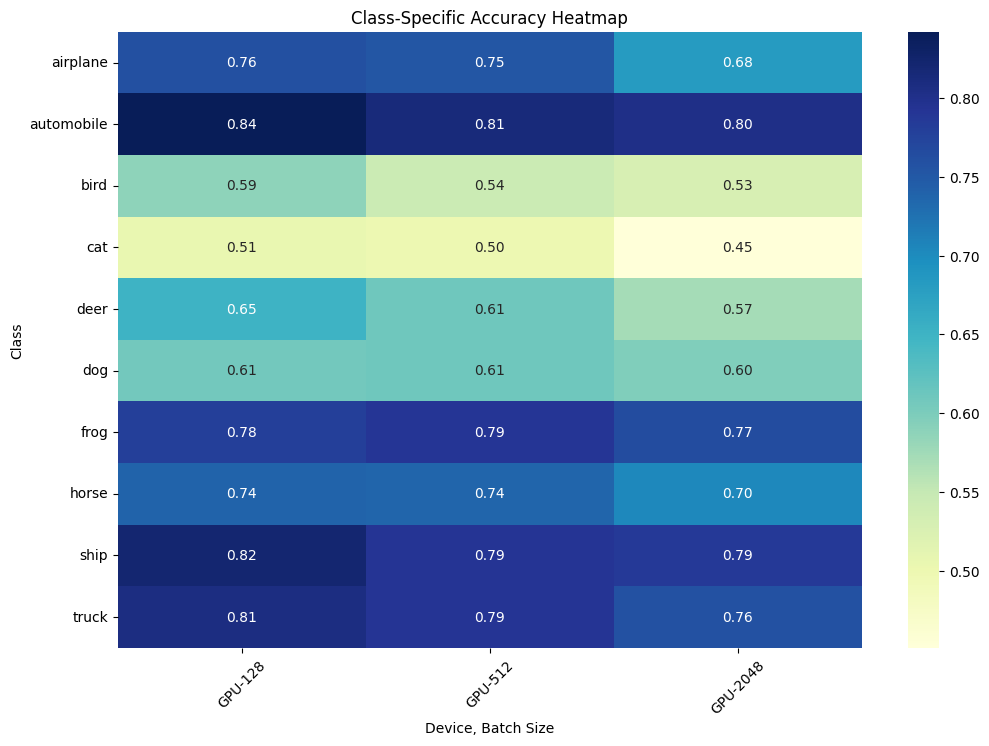

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the DataFrame to keep only the specified devices
filtered_confusion_df = confusion_df[confusion_df['Device'].isin(devices)]

# Pivot the filtered data to create a heatmap grid
heatmap_data = filtered_confusion_df.pivot(index='Class', columns=['Device', 'Batch Size'], values='Class-specific Accuracy')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title('Class-Specific Accuracy Heatmap')
plt.xlabel('Device, Batch Size')
plt.ylabel('Class')
plt.xticks(rotation=45)
plt.show()


In [48]:
# Create an empty DataFrame to hold the summary data
summary_data = pd.DataFrame(columns=['Class', 'Device', 'Batch Size', 'mean accuracy', 'Class Specific Rank', 'Training Time (s)'])

# Filter the DataFrame to get relevant rows for the specified devices
filtered_df = confusion_df[confusion_df['Device'].isin(devices)]

# Calculate mean accuracy for each class, device, and batch size combination
summary_data['Class'] = filtered_df['Class']
summary_data['Device'] = filtered_df['Device']
summary_data['Batch Size'] = filtered_df['Batch Size']
summary_data['mean accuracy'] = filtered_df.groupby(['Class', 'Device', 'Batch Size'])['Class-specific Accuracy'].transform('mean')

# Calculate the class-specific rank based on the 'mean accuracy' score for each combination
summary_data['Class Specific Rank'] = summary_data.groupby(['Class'])['mean accuracy'].rank(ascending=False).astype(int)

# Create a dictionary to map (Batch Size, Device) pairs to training times
training_times = {(row['Batch Size'], row['Device']): row['Training Time (s)'] for _, row in df[df['Device'].isin(devices)].iterrows()}

# Update the 'Training Time (s)' column in 'summary_data' based on the mapping
summary_data['Training Time (s)'] = summary_data.apply(lambda row: training_times.get((row['Batch Size'], row['Device']), np.nan), axis=1)

# Display the statistical summary
print(summary_data)


         Class Device  Batch Size  mean accuracy  Class Specific Rank  \
0     airplane    GPU         128          0.760                    1   
1   automobile    GPU         128          0.842                    1   
2         bird    GPU         128          0.587                    1   
3          cat    GPU         128          0.505                    1   
4         deer    GPU         128          0.651                    1   
5          dog    GPU         128          0.608                    2   
6         frog    GPU         128          0.780                    2   
7        horse    GPU         128          0.739                    1   
8         ship    GPU         128          0.822                    1   
9        truck    GPU         128          0.808                    1   
10    airplane    GPU         512          0.753                    2   
11  automobile    GPU         512          0.814                    2   
12        bird    GPU         512          0.544   

In [51]:
# Merge "Device" and "Batch Size" into one column "Batch-Device"
summary_data['Batch-Device'] = summary_data['Device'] + ' ' + summary_data['Batch Size'].astype(str)

# Calculate the overall mean accuracy for each batch-device combination
overall_mean_accuracy = summary_data.groupby(['Batch-Device'])['mean accuracy'].mean().reset_index()
overall_mean_accuracy.rename(columns={'mean accuracy': 'Overall Mean Accuracy'}, inplace=True)

# Define a weight for training time (you can adjust this as needed)
training_time_weight = 0.30  # You can change this weight

# Create a pivot table to count the occurrences of each rank for each combination
pivot_table = pd.pivot_table(summary_data, index=["Batch-Device"], columns="Class Specific Rank", aggfunc='size', fill_value=0)

# Calculate the weighted average for each combination based on ranks and training time
weights = np.arange(1, len(pivot_table.columns) + 1)  # Weights for all ranks
pivot_table["Weighted Rank"] = (pivot_table * weights).sum(axis=1)
pivot_table["Weighted Training Time"] = summary_data.groupby(['Batch-Device'])['Training Time (s)'].mean()
pivot_table["Weighted Average"] = (
    (1 - training_time_weight) * pivot_table["Weighted Rank"] +
    training_time_weight * pivot_table["Weighted Training Time"]
)

# Reset the index to make "Device" and "Batch Size" columns
pivot_table.reset_index(inplace=True)

# Merge the overall mean accuracy into the pivot table based on "Device" and "Batch Size"
pivot_table = pivot_table.merge(overall_mean_accuracy, on=["Batch-Device"])

# Rename the columns for better clarity
pivot_table.columns.name = None

# Add an "Overall Rank" column based on "Weighted Average" and sort by it in ascending order
pivot_table["Overall Rank"] = pivot_table["Weighted Average"].rank(method='min')

# Sort the DataFrame by "Weighted Average" in ascending order
pivot_table.sort_values(by="Weighted Average", ascending=True, inplace=True)

# Select the columns you want to display
selected_columns = ["Overall Rank", "Batch-Device", "Weighted Training Time", "Overall Mean Accuracy"]

# Use loc to select and print only the specified columns
print(pivot_table.loc[:, selected_columns])


   Overall Rank Batch-Device  Weighted Training Time  Overall Mean Accuracy
2           1.0      GPU 512               37.415977                 0.6944
0           2.0      GPU 128               69.561852                 0.7102
1           3.0     GPU 2048               30.048192                 0.6649
